Brandon Rasgaitis 
Tye

Question 1:
CIFAR10 is a small images classification dataset of 50,000 32x32 color training images and 10,000 test images 

*inputs are tuples (x_train, y_train), (x_test, y_test)

*labels are x_test, y_test
      -represent 10 categories ex.) bird, cat, etc.

*dimensions of data set are [32x32]










Question 2: 

170508288/170498071 [==============================] - 3s 0us/step


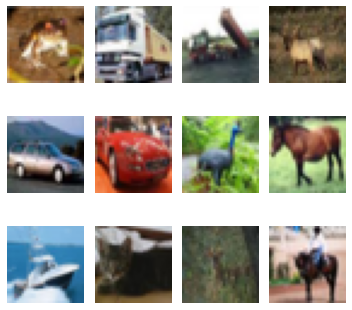

In [ ]:
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4, k+1)
    plt.imshow(x_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

x_train = x_train.reshape(50000, 3072).astype('float32')
x_train /= 255.0
x_test = x_test.reshape(10000, 3072).astype('float32')
x_test /= 255.0



n_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, n_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, n_classes)

training_data = x_train, y_train
testing_data = x_test, y_test



Question 3: 

In [ ]:
from keras import activations
from keras.layers import Dense 
from keras.models import Sequential
from keras.optimizers import gradient_descent_v2, adam_v2 

def model_func(weights = None):
  model = Sequential()
  model.add(Dense(64, activation='sigmoid', input_shape=(3072,))) #input layer 3072 comes from 32 x 32 x 3
  model.add(Dense(10, activation='softmax')) #Output layer
  if weights:
    model.load_weights(weights)
  return model

def model_func2(weights = None):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_shape=(3072,))) #note: to change number of neurons in hidden layer change the value 64
  model.add(Dense(10, activation='softmax')) #Output layer
  if weights:
    model.load_weights(weights)
  return model

def model_func3(weights = None):
  model = Sequential()
  model.add(Dense(64, activation='linear', input_shape=(3072,)))
  model.add(Dense(10, activation='softmax'))
  if weights:
    model.load_weights(weights)
  return model


Question 4: 

In [ ]:
from keras.optimizer_experimental.sgd import optimizer
lr = 0.01
weight_decay = 1e-6
momentum = 0.9 
model = model_func()
model2 = model_func2()
model3 = model_func3()
sgd = gradient_descent_v2.SGD(lr = lr, decay = weight_decay, momentum=momentum
                              , nesterov=True)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #This is the first model which used 64 neurons in hidden layer, categorical_crossentropy loss function, and gradient_descent_v2 optimizer or SGD 
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())
print(model2.summary())
print(model3.summary())
print("\nSigmoid")
model.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)
print("\nRelu")
model2.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)
print("\nlinear")
model3.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 64)                196672    
                                                                 
 dense_115 (Dense)           (None, 10)                650       
                                                                 
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 64)                196672    
                                                                 
 dense_117 (Dense)           (None, 10)                650       
                                                                 
Total params: 197,3

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


None

Sigmoid
Epoch 1/20
391/391 [==============================] - 5s 11ms/step - loss: 2.0061 - accuracy: 0.2929 - val_loss: 1.8693 - val_accuracy: 0.3396
Epoch 2/20
391/391 [==============================] - 4s 9ms/step - loss: 1.8218 - accuracy: 0.3643 - val_loss: 1.7875 - val_accuracy: 0.3728
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: 1.7616 - accuracy: 0.3848 - val_loss: 1.7397 - val_accuracy: 0.3905
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: 1.7189 - accuracy: 0.4002 - val_loss: 1.7077 - val_accuracy: 0.4041
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 1.6852 - accuracy: 0.4103 - val_loss: 1.6688 - val_accuracy: 0.4174
Epoch 6/20
391/391 [==============================] - 3s 9ms/step - loss: 1.6548 - accuracy: 0.4239 - val_loss: 1.6403 - val_accuracy: 0.4292
Epoch 7/20
391/391 [==============================] - 3s 9ms/step - loss: 1.6285 - accuracy: 0.4311 - val_loss: 1.6250 - val_accuracy

Question 5: 

In [ ]:
def model_func4(weights = None):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(3072,))) #note: to change number of neurons in hidden layer change the value 64
  model.add(Dense(10, activation='softmax')) #Output layer
  if weights:
    model.load_weights(weights)
  return model

def model_func5(weights = None):
  model = Sequential()
  model.add(Dense(256, activation='relu', input_shape=(3072,))) #note: to change number of neurons in hidden layer change the value 64
  model.add(Dense(10, activation='softmax')) #Output layer
  if weights:
    model.load_weights(weights)
  return model

def model_func6(weights = None):
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(3072,))) #note: to change number of neurons in hidden layer change the value 64
  model.add(Dense(10, activation='softmax')) #Output layer
  if weights:
    model.load_weights(weights)
  return model

def model_func7(weights = None):
  model = Sequential()
  model.add(Dense(512, activation='relu', input_shape=(3072,))) #note: to change number of neurons in hidden layer change the value 64
  model.add(Dense(512, activation='relu', input_shape=(3072,))) #additional hidden layer
  model.add(Dense(10, activation='softmax')) #Output layer
  if weights:
    model.load_weights(weights)
  return model

In [ ]:
model4 = model_func4()
model5 = model_func5()
model6 = model_func6()
model7 = model_func7()
model8 = model_func7()

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) #model 7 tested with sgd optimizer, and categorical_crossentropy loss function


print(model4.summary())
print(model5.summary())
print(model6.summary())
print(model7.summary())
print(model8.summary())

print("\nRelu with 128 neurons")
model4.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)
print("\nRelu with 256 neurons")
model5.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)
print("\nRelu with 512 neurons")
model6.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)
print("\nRelu with additional hidden layer with 512 neurons")
model7.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)
print("\nRelu with additional hidden layer with 512 neurons, sgd optimizer, categorical_crossentropy loss function")
model7.fit(x_train, y_train, batch_size=128, epochs=20,
          validation_data=(x_test, y_test), verbose = 1)

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 128)               393344    
                                                                 
 dense_121 (Dense)           (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_122 (Dense)           (None, 256)               786688    
                                                                 
 dense_123 (Dense)           (None, 10)                2570      
                                                                 
Total params: 789,2

Model2 was the relu activation function which had the best increasing accuracy starting of all the activation functions used, with 64 neurons in the Hidden Layer 
--> Epoch 1: 0.3382 accuracy, Epoch 20: 0.5231 accuracy 

Moedel4 was then updated, with 128 neurons in the hidden layer, using adam for the optimizer, and binary_crossentropy for the loss function 
--> Epoch 1: 0.0.3101 accuracy, Epoch 20: 0.5297 

Model5 updated with 256 neurons in the hidden layer
--> Epoch 1: 0.3180, Epoch 20: 0.5222

Model6 updated with 512 neurons in the hidden layer
--> Epoch 1: 0.3222 accuracy, Epach 20: 0.4992 accuracy

Model7 updates with additional hidden layer with 512 neurons
--> Epoch 1: 0.3262 accuracy, Epoch 20: 0.6177 accuracy

Model8, same as model 7, however uses the original optimizer and loss function used from model 2
--> Epoch 1: 0.6243 accuracy, Epoch 20: 0.7362 accuracy 

* Updating model 6 with 512 neurons in the hidden layer provided the most accuracy accumlated at the cost of longer ETA times. 
* As neurons in the hidden layer increase and additional hidden layers are implemented, accuracy in training the data improves slightly across 128, 256, and 512 neurons. 
* note increasing the amount of neurons in the additional hidden layer also increase the accuracy while slowing down the ETA.
* The best results were in model 8 using the orginal optimizer, sgd, and loss function, categorical_crossentropy, and an additional hidden layer usiing 512 neurons. 
* changing the optimizer to adam, and the loss function to binary_crossentropy had similar results, however adding the additional hidden layer proved categorical cross entroy, and sgd had the best starting accuracy, and final accuracy on the 20th Epoch
